In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

In [2]:
plt.figure(figsize = (12,12))


<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [3]:
omega = 2
omegasq = omega**2
a, b, c, d = 0, 1, omegasq, -0.5

In [4]:
def dx_dt(xx,t):
    x = xx[0]
    y = xx[1]
    term1 = a*x + b*y
    term2 = -omegasq*np.sin(x) + d*y
    return [term1, term2]

In [5]:
maxtime = 20
xmin = -8
xmax = 8
ts = np.linspace(0, maxtime, 1000)
ic = np.linspace(xmin, xmax, 8)

(-8.0, 8.0)

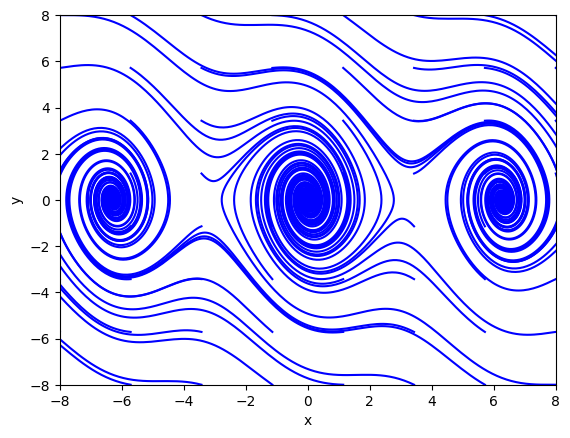

In [6]:
for r in ic:
    for s in ic:
        x0 = [r,s]
        xs = odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"b")

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(xmin,xmax)
plt.ylim(xmin,xmax)

---
# Competing Species Example

In [7]:
plt.style.use('ggplot')

import sympy as sm

In [8]:
# Paramters for "mutual exclusion
beta = 1
delta = 2
gamma = 3
b = 1
d = 2
c = 3

def dz_dt(z,t):
   return [z[0]*(beta - delta*z[0] - gamma*z[1]), z[1]*(b - d*z[1] - c*z[0])]

In [9]:
# Find critical points

#define symbolic exprsssion
x, y = sm.symbols('x,y')
P = x*(beta - delta*x - gamma*y)
Q = y*(b - d*y - c*x)

#Set P(x,y) = 0 and Q(x,y) = 0
Peqn = sm.Eq(P,0)
Qeqn = sm.Eq(Q,0)

In [14]:
#solve our equations for populations of species of x and y
criticalpoints = sm.solve((Peqn,Qeqn),x,y)
print(criticalpoints)

[(0, 0), (0, 1/2), (1/5, 1/5), (1/2, 0)]


In [19]:
#calculate a vectorfield
X,Y = np.mgrid[0:0.5:20j,0:0.5:20j]
u = X*(beta - delta*X - gamma*Y)
v = Y*(b-d*Y-c*X)

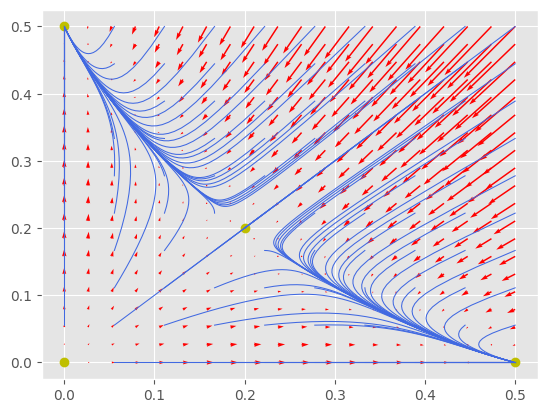

In [25]:
for i in range(4):
    plt.plot(criticalpoints[i][0],criticalpoints[i][1],"yo")
    
#we can color our critical points algorithmically
plt.quiver(X,Y,u,v,color = "red")

#plot trajectories
ts = np.linspace(0,10.500)
ic = np.linspace(0,0.5,10)
for r in ic:
    for s in ic:
        z0 = [r,s]
        zs = odeint(dz_dt,z0,ts)
        plt.plot(zs[:,0],zs[:,1], "royalblue",linewidth = 0.75)
        

[1. 1.]
[-1.  -0.5]


AttributeError: 'EigResult' object has no attribute 'eignvalues'

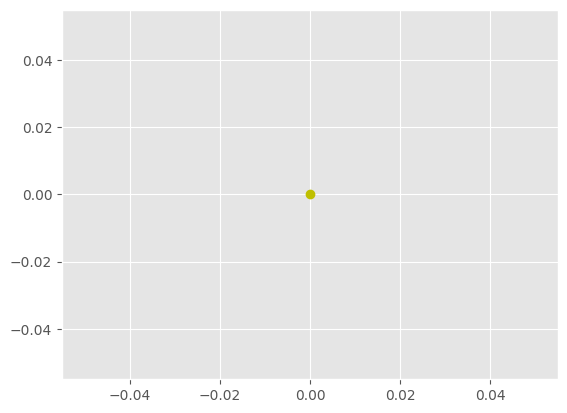

In [41]:
for k in range(4):
    xx = float(criticalpoints[k][0])
    yy = float(criticalpoints[k][1])
    J = np.array([[beta-2*delta*xx - gamma*yy, -gamma*xx], [-c*yy, b -2*d*yy-c*xx]])
    eval = np.linalg.eig(J)
    print(np.linalg.eig(J).eigenvalues)

    pointcolor = 'ro'
    if(eval.eigenvalues[0]<0 and eval.eignvalues[1]<0):
        pointcolor = "yo"
    
    plt.plot(criticalpoints[k][0],criticalpoints[k][1],"yo")

---
# Animation fun time!

Text(0.5, 1.0, 'Exothermic Reactor with Tc = 305.0 K')

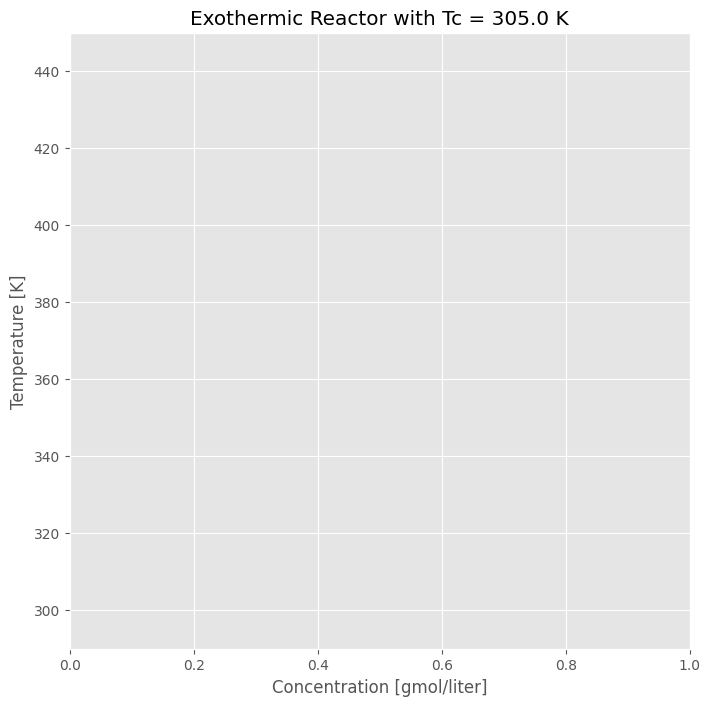

In [42]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
from scipy.integrate import odeint

from matplotlib import animation
from IPython.display import HTML

# https://github.com/jckantor/CBE30338
# THIS FILE IS ORIGINALLY BY Jeff Kantor at University of Notre Dame

# mode parameteres
Ea = 72750 # activation energy J/gmol
R = 8.314 # gas constant J/gmol/K
k0 = 7.2e10 # Arrhenius rate constant 1/min
V = 100.0 # Volume [L]
rho = 1000.0 # Density [g/L]
Cp = 0.239 # Heat capacity [J/g/K]
dHr = -5.0e4 # Enthalpy of reaction [J/mol]
UA = 5.0e4 # Heat transfer [J/min/K]
q = 100.0 # Flowrate [L/min]
cAi = 1.0 # Inlet feed concentration [mol/L]
Ti = 350.0 # Inlet feed temperature [K]
cA0 = 0.5; # Initial concentration [mol/L]
T0 = 350.0; # Initial temperature [K]
Tc = 305.0 # Coolant temperature [K]

# Arrhenius rate expression
def k(T):
    return k0*np.exp(-Ea/R/T)

def deriv(y,t):
    cA,T = y
    dcA = (q/V)*(cAi - cA) - k(T)*cA
    dT = (q/V)*(Ti - T) + (-dHr/rho/Cp)*k(T)*cA + (UA/V/rho/Cp)*(Tc-T)
    return [dcA,dT]

# create a set of initial conditions
ICs = [[cA0,T0] for cA0 in [0] for T0 in np.linspace(295,480,19)]
ICs += [[cA0,T0] for cA0 in np.linspace(0,1,21) for T0 in [290]]
ICs += [[cA0,T0] for cA0 in [1] for T0 in np.linspace(295,475,18)]

# create background figure and axes
#sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim((0,1))
ax.set_ylim((290,450))
ax.set_xlabel('Concentration [gmol/liter]')
ax.set_ylabel('Temperature [K]')
ax.set_title('Exothermic Reactor with Tc = {0:.1f} K'.format(Tc))
